## Задание


**Цель:** изучить применение дерева решений в рамках задачи регрессии  

**Описание задания:**  
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.


**Этапы работы:**

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проведите первичный анализ.  
    a.Проверьте данные на пропуски. Удалите в случае обнаружения.  
    b.*Нормализуйте один из признаков.  
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Обучите модель регрессии на обучающем множестве.
5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.  
6. Обучите дерево решений на обучающем множестве.  
    a. Повторите п. 5 для полученной модели.  
    b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.  
7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.  
    a. Повторите п. 5 для полученной модели.  
8.  Сформулируйте выводы по проделанной работе.  
    a. Сравните точность двух моделей.  
    b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?  


Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.


**Результат:** получены знания по работе с деревом решений


**Форма выполнения:**
- ссылка на Jupyter Notebook, загруженный на GitHub;
- ссылка на Google Colab;
- файл с расширением .ipynb.


**Инструменты:**
- Jupyter Notebook/Google Colab;
- GitHub;
- библиотека sklearn.datasets;
- модель регрессии;
- дерево решений.

**Рекомендации к выполнению:**

- текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown;
- у графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность;
- убедитесь, что по ссылкам есть доступ на чтение/просмотр;
- убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [3]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

data = california_housing.frame

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 2. Проведите первичный анализ.
    a. Проверьте данные на пропуски. Удалите в случае обнаружения.
    b. *Нормализуйте один из признаков.

In [4]:
# Через .info() видим, что пропусков нет
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# На всякий случай проверим еще на наличие значений, которые могут обозначать пропуски

data.isin([0, 'none', 'nan', 'Nan', 'NaN']).any()

MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
MedHouseVal    False
dtype: bool

### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [59]:
# Воспользуемся пайплайном из ноутбука из лекции и внесем в него еще метрику RMSE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



def get_score_linear(X,y, random_seed=42):
    
    model = LinearRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed) 

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = model.score(X_test, y_test)
    return r2


### 4. Обучите модель регрессии на обучающем множестве. + 5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [7]:
X = data.drop(columns=['MedHouseVal'])
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y = data['MedHouseVal']

y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [60]:
r2 = get_score_linear(X, y)

print('R2 = {}'.format(r2))

R2 = 0.5957702326061664


### 6. Обучите дерево решений на обучающем множестве.  
    a. Повторите п. 5 для полученной модели.  
    b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.  

In [41]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

clf.fit(X_train, y_train)
    


DecisionTreeRegressor()

In [42]:
score = clf.score(X_test, y_test)
score

0.591507910773682

In [43]:
clf.get_depth()

34

In [44]:
clf_depth_3 = DecisionTreeRegressor(max_depth = 3)

clf_depth_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [45]:
score = clf_depth_3.score(X_test, y_test)
score

0.5180822912445064

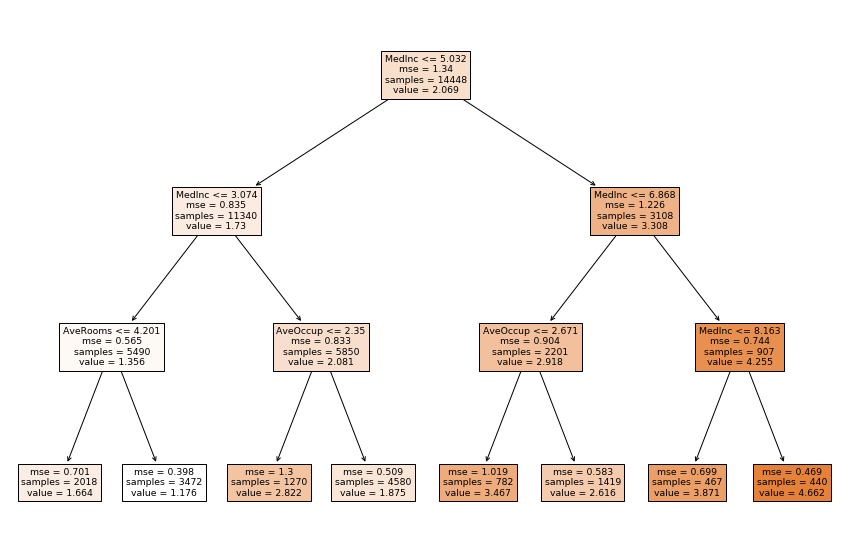

In [27]:
from sklearn import tree

fig = plt.figure(figsize=(15,10))
tree.plot_tree(clf_depth_3, feature_names = X_train.columns, filled=True);

### 7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.  
    a. Повторите п. 5 для полученной модели.

In [50]:
# Оптимизация по параметру max_depth
list_depth = [3,4,5,6,7,8,9,10]

decision_trees_depths = {}
for i in list_depth:
    decision_trees_depths[f'depth={i}'] = DecisionTreeRegressor(max_depth=i).fit(X_train, y_train)

decision_trees_depths

{'depth=3': DecisionTreeRegressor(max_depth=3),
 'depth=4': DecisionTreeRegressor(max_depth=4),
 'depth=5': DecisionTreeRegressor(max_depth=5),
 'depth=6': DecisionTreeRegressor(max_depth=6),
 'depth=7': DecisionTreeRegressor(max_depth=7),
 'depth=8': DecisionTreeRegressor(max_depth=8),
 'depth=9': DecisionTreeRegressor(max_depth=9),
 'depth=10': DecisionTreeRegressor(max_depth=10)}

In [51]:
# Scores

decision_trees_depths_scores = {}
for key, decision_tree in decision_trees_depths.items():
      decision_trees_depths_scores[key] = decision_tree.score(X_test, y_test)
        
decision_trees_depths_scores

{'depth=3': 0.5180822912445064,
 'depth=4': 0.5676934558406003,
 'depth=5': 0.6029986793705844,
 'depth=6': 0.6355180481996897,
 'depth=7': 0.6542946784817603,
 'depth=8': 0.6778442817403468,
 'depth=9': 0.6973496132231113,
 'depth=10': 0.6905923981939935}

Дерево с параметром max_depth=9 получилось самым точным. Попробуем его визуализировать

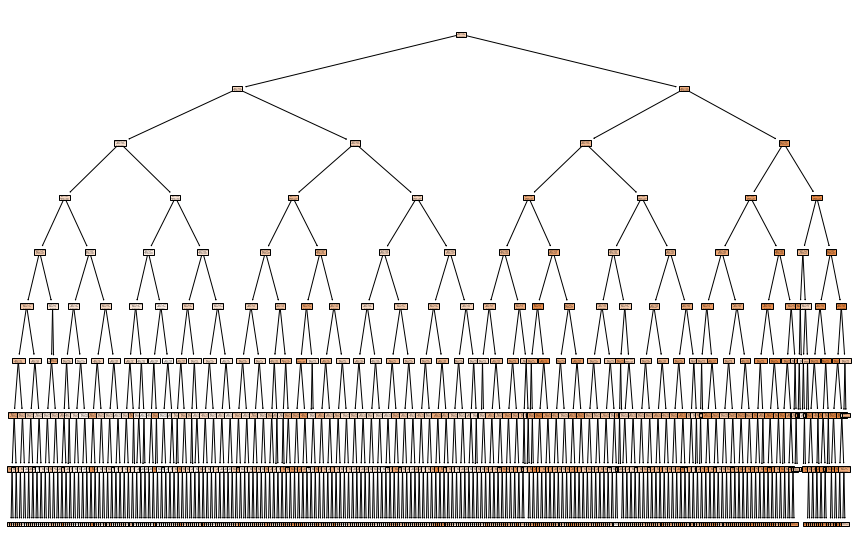

In [52]:
# К сожалению это дерево получилось не читаемым из-за своей глубины

from sklearn import tree

fig = plt.figure(figsize=(15,10))
tree.plot_tree(decision_trees_depths['depth=9'], feature_names = X_train.columns, filled=True);

In [53]:
# Оптимизация по параметру min_samples_leaf

list_min_samples_leaf = [5,10,15,20,25,30,35,40,50]

decision_trees_min_leaf = {}
for i in list_min_samples_leaf:
    decision_trees_min_leaf[f'min_samples_leaf={i}'] = DecisionTreeRegressor(min_samples_leaf=i, random_state=10).fit(X_train, y_train)

decision_trees_min_leaf

{'min_samples_leaf=5': DecisionTreeRegressor(min_samples_leaf=5, random_state=10),
 'min_samples_leaf=10': DecisionTreeRegressor(min_samples_leaf=10, random_state=10),
 'min_samples_leaf=15': DecisionTreeRegressor(min_samples_leaf=15, random_state=10),
 'min_samples_leaf=20': DecisionTreeRegressor(min_samples_leaf=20, random_state=10),
 'min_samples_leaf=25': DecisionTreeRegressor(min_samples_leaf=25, random_state=10),
 'min_samples_leaf=30': DecisionTreeRegressor(min_samples_leaf=30, random_state=10),
 'min_samples_leaf=35': DecisionTreeRegressor(min_samples_leaf=35, random_state=10),
 'min_samples_leaf=40': DecisionTreeRegressor(min_samples_leaf=40, random_state=10),
 'min_samples_leaf=50': DecisionTreeRegressor(min_samples_leaf=50, random_state=10)}

In [54]:
# Scores

min_samples_leaf_scores = {}
for key, decision_tree in decision_trees_min_leaf.items():
      min_samples_leaf_scores[key] = decision_tree.score(X_test, y_test)
        
min_samples_leaf_scores

{'min_samples_leaf=5': 0.679977838130057,
 'min_samples_leaf=10': 0.7094770038268796,
 'min_samples_leaf=15': 0.7167626548101413,
 'min_samples_leaf=20': 0.717140104280791,
 'min_samples_leaf=25': 0.7163236464383372,
 'min_samples_leaf=30': 0.7101813206082034,
 'min_samples_leaf=35': 0.7090965069268561,
 'min_samples_leaf=40': 0.7095829370083794,
 'min_samples_leaf=50': 0.7024229334690348}

In [55]:
# Дерево с параметром min_samples_leaf=20 получилось самым точным, но его глубина равна 17 и поэтому не будем его визуализировать

decision_trees_min_leaf['min_samples_leaf=20'].get_depth()

17

In [56]:
# Попробуем построить "оптимальное" где возьмем max_depth = 10 и min_samples_leaf= 20

optimal_decision_tree = DecisionTreeRegressor(max_depth = 9, min_samples_leaf= 20)

optimal_decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=20)

In [57]:
# Как можем видеть у "оптимального" дерева результат не очень оптимальный :(

optimal_decision_tree.score(X_test, y_test)

0.7031639769965099

### 8. Сформулируйте выводы по проделанной работе.  



In [64]:
# Сравним результаты разных моделей
print('Простая линейная модель: R2 = {}'.format(r2))
print('Decision Tree c глубиной 34: R2 = {}'.format(clf.score(X_test, y_test)))
print('Decision Tree c глубиной 3: R2 = {}'.format(clf_depth_3.score(X_test, y_test)))
print('Decision Tree c глубиной 9: R2 = {}'.format(decision_trees_depths['depth=9'].score(X_test, y_test)))
print('Decision Tree c min_samples_leaf равным 20: R2 = {}'.format(decision_trees_min_leaf['min_samples_leaf=20'].score(X_test, y_test)))
print('Decision Tree c глубиной 9 и min_samples_leaf равным 20: R2 = {}'.format(optimal_decision_tree.score(X_test, y_test)))



Простая линейная модель: R2 = 0.5957702326061664
Decision Tree c глубиной 34: R2 = 0.591507910773682
Decision Tree c глубиной 3: R2 = 0.5180822912445064
Decision Tree c глубиной 9: R2 = 0.6973496132231113
Decision Tree c min_samples_leaf равным 20: R2 = 0.717140104280791
Decision Tree c глубиной 9 и min_samples_leaf равным 20: R2 = 0.7031639769965099


- По итогам можно увидеть, что оптимизация по глубине дерева и по параметру min_samples_leaf по отдельности дали самый высокий прирост к точности модели.
- Без ограничения по параметру глубины дерева модель достигла 34 уровней, но точность была как у обычной линейной модели, что говорит о сильной переобученности дерева
- Построение дерева с использованием параметров для глубины дерева и min_samples_leaf, которые по отдельности дали лучший прирост к точносости модели в совокупности не дали улучшепия качества модели.

Полагаю для достижения более точных результатов нужно будет провести оптимизация этих двух параметров вместе или оптимизировать по другим параметрам